# 4.7 The Basics of Filtering in the Frequency Domain

## 4.7.1 Fourier Spectrum

### Function `fft2`

The DFT and its inverse are obtained in practice using a fast Fourier transform (FFT) algorithm. The FFT of an image array $f$ is obtained in MATLAB using function `fft2`, which has the syntax:

**F = fft2(f)**

This function returns a Fourier transform that is also of size $M\times N$, with the origin of the data at the top left, and with four quarter periods meeting at the center of the frequency rectangle.

It is necessary to pad the input image with zeros when the Fourier transform is used for filtering. In this case, the syntax becomes

**F = fft2(f, P, Q)**

With this syntax, `fft2` pads $f$ with the required number of zeros so that the resulting transform is of size $P\times Q$.

### Function `abs`

The Fourier spectrum is obtained by using function `abs`

**S = abs(F)**

which computes the magnitude (square root of the sum of the squares of the real and imaginary parts) of each element of the array.

### Function `fftshift`

Function `fftshift` can be used to move the origin of the transform to the center of the frequency rectangle. The syntax is

**Fc = fftshift(F)**

where $F$ is the transform computed using `fft2` and $Fc$ is the centered transform. Function `fftshift` operates by swapping the quadrants of $F$. For example, if `a = [1 2; 3 4]`, then `fftshift(a) = [4 3; 2 1]`.

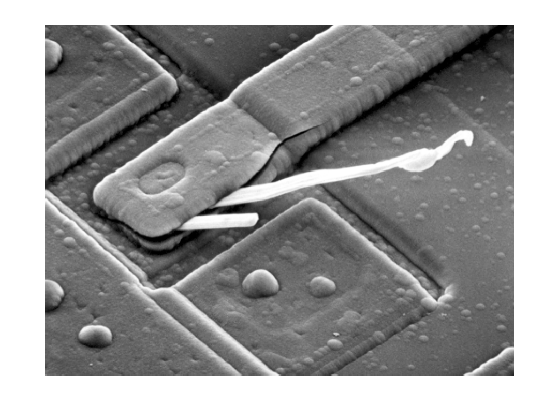

In [83]:
f = imread('Fig0429(a).tif');
f = tofloat(f);
imshow(f)

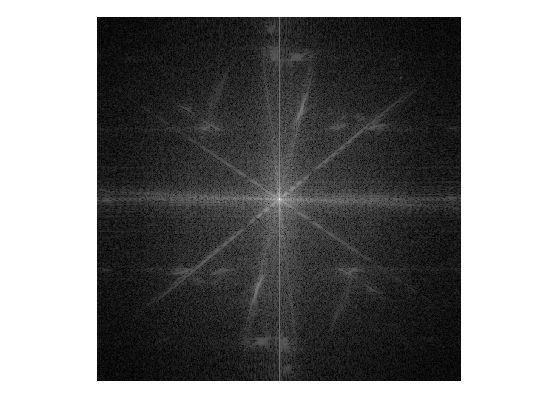

In [93]:
F = fft2(f);
S = fftshift(log(1 + abs(F)));
figure, imshow(S, []);

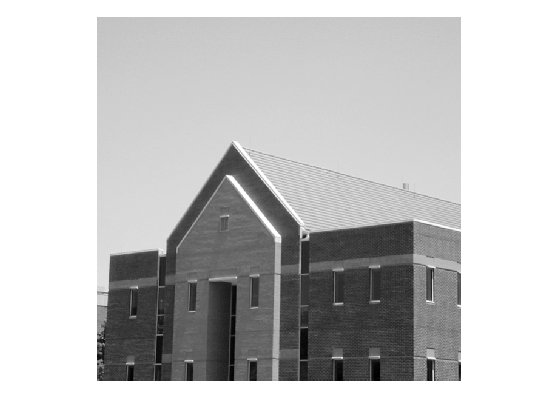

In [94]:
f = imread('Fig0438(a).tif');
f = tofloat(f);
imshow(f);

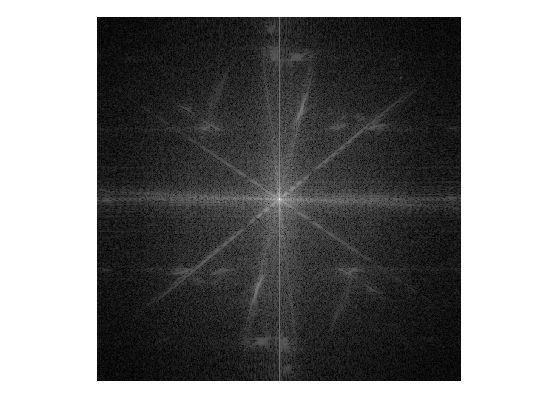

In [90]:
F = fft2(f);
S = log(1 + abs(F));
figure, imshow(S, []);

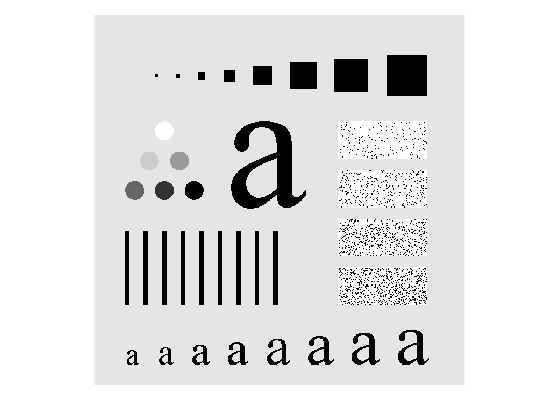

In [115]:
f = imread('Fig0441(a).tif');
f = tofloat(f);
imshow(f);

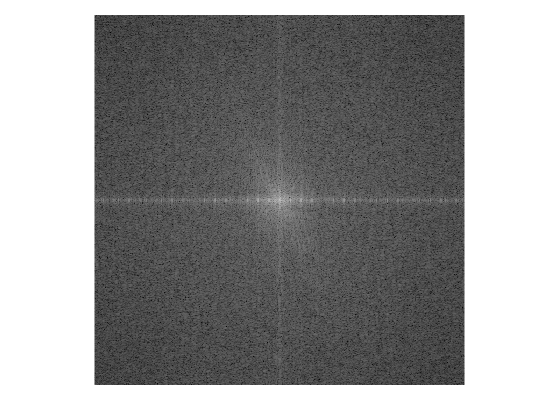

In [119]:
F = fft2(f);
S = fftshift(log(1 + abs(F)));
imshow(S, []);

# 4.8 Image Smoothing Using Frequency Domain Filters

## 4.8.1 Ideal Lowpass Filters (ILPF)

### Function `lpfilter`

Function `lpfilter` can generate the transfer functions of the lowpass filters (Ideal, Butterworth, and Gaussian), which has the syntax:

**H = lpfilter(type, M, N, D0, n)**

where, `type` is the type of lowpass filters, the valid values of `type` are `'ideal'`, `'btw'` (Butterworth), and `'gaussian'`. $M$ and $N$ specified the size of image. `D0` is the cutoff frequency $D_0$, $n$ is the order in Butterworth Filter.

### Function `dftfilt`

Function `dftfilt` is used for filtering in the frequency domain, which has the basic syntax:

**g = dftfilt(f, H)**

This function filters $f$ in the frequency domain using the filter transfer function $H$. The output $g$, is the filtered image, which has the same size as $f$.

### Example 4.16: Image smoothing using an ILPF.

The original image.

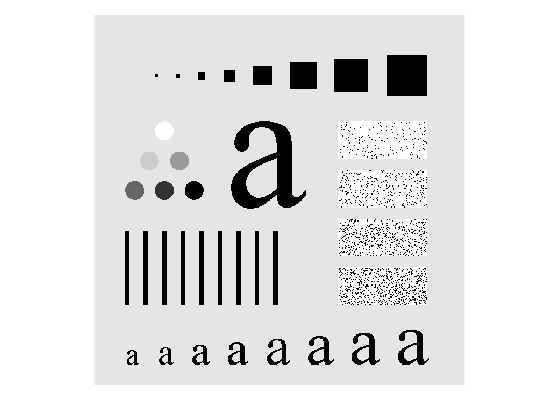

In [53]:
f = imread('Fig0442(a).tif');
[f, revertclass] = tofloat(f);
imshow(f);

Next five images are the results of filtering using ILPFs with cutoff frequencies set at radii values 10, 30, 60, 160 and 460. The power removed by these filters was 13, 6.9, 4.3, 2.2, and 0.8% of the total, respectively.

$D_0=10$

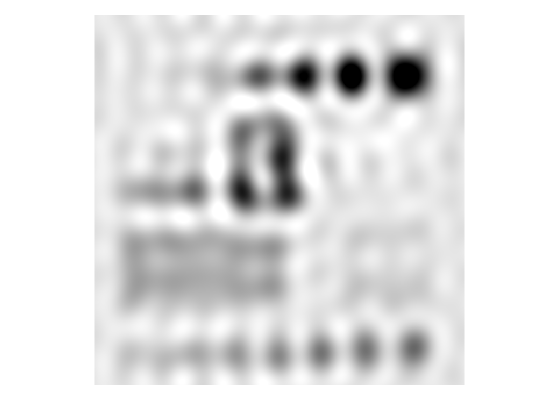

In [57]:
[M, N] = size(f);

H10 = lpfilter('ideal', M, N, 10);
g10 = dftfilt(f, H10);
figure, imshow(g10);

$D_0=30$

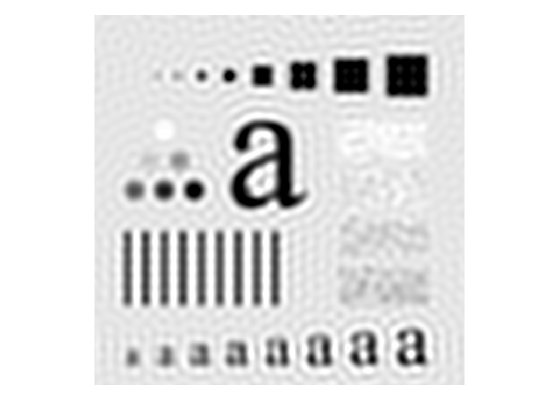

In [58]:
H30 = lpfilter('ideal', M, N, 30);
g30 = dftfilt(f, H30);
figure, imshow(g30);

$D_0=60$

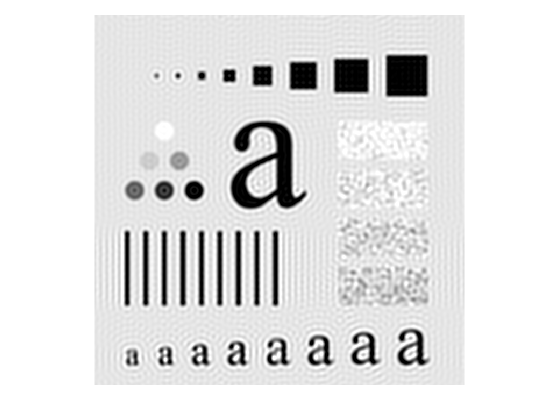

In [59]:
H60 = lpfilter('ideal', M, N, 60);
g60 = dftfilt(f, H60);
figure, imshow(g60);

$D_0=160$

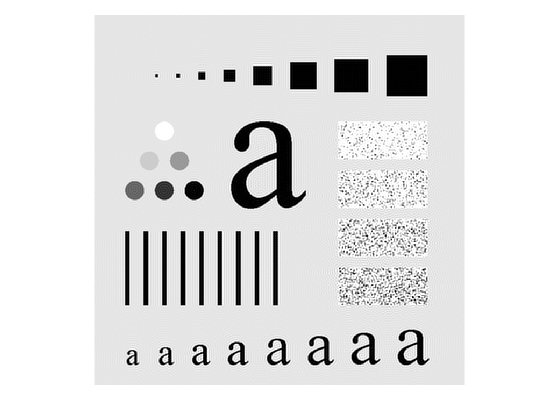

In [60]:
H160 = lpfilter('ideal', M, N, 160);
g160 = dftfilt(f, H160);
figure, imshow(g160);

$D_0=460$

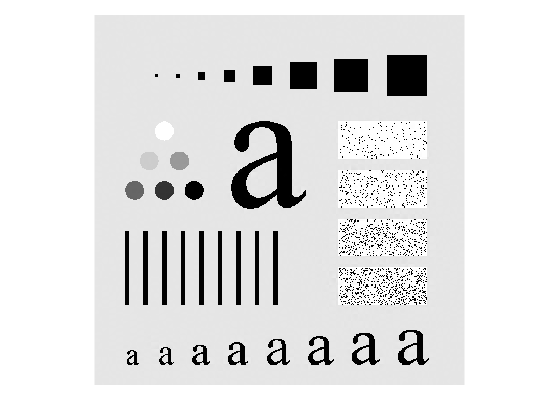

In [61]:
H460 = lpfilter('ideal', M, N, 460);
g460 = dftfilt(f, H460);
figure, imshow(g460);

## 4.8.3 Gaussian Lowpass Filters (GLPF)

The original image shows a sample of text of poor resolution. The characters in this document have distorted shapes due to lack of resolution, and many of the charaters are broken.

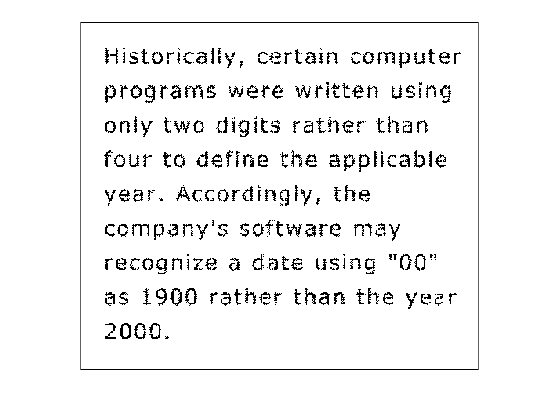

In [69]:
f = imread('Fig0449(a).tif');
imshow(f);

One approach for handling this problem is to bridge small gaps in the input image by blurring it. Next image shows how well characters can be "repaired" by this simple process using a Gaussian lowpass filter with $D_0=80$.

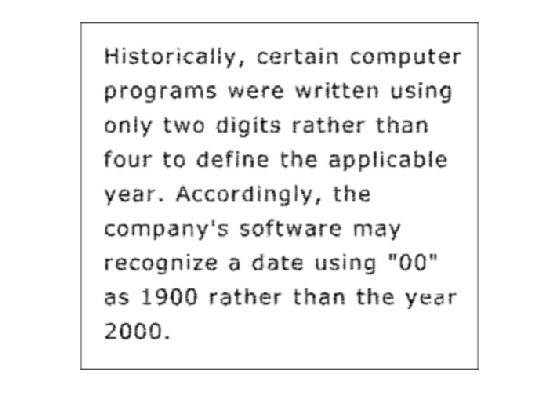

In [70]:
[M, N] = size(f);

H = lpfilter('gaussian', M, N, 80);
g = dftfilt(f, H);
figure, imshow(g);

Next images show an application of lowpass filtering for producing a smoother, softer-looking result from a sharp original.

警告: 图像太大，无法在屏幕上显示；将以 67% 显示
> In images.internal.initSize (line 71)
  In imshow (line 336)



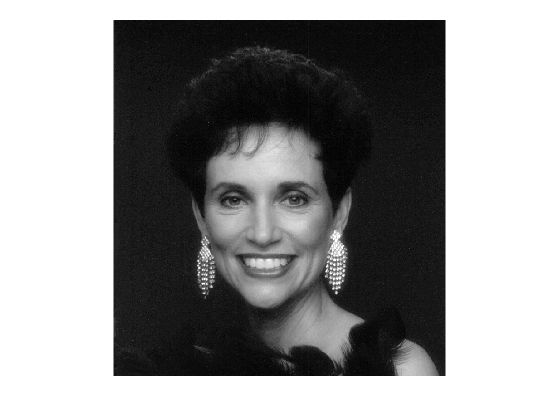

In [63]:
f = imread('Fig0450(a).tif');
imshow(f);

$D_0=100$

警告: 图像太大，无法在屏幕上显示；将以 67% 显示
> In images.internal.initSize (line 71)
  In imshow (line 336)



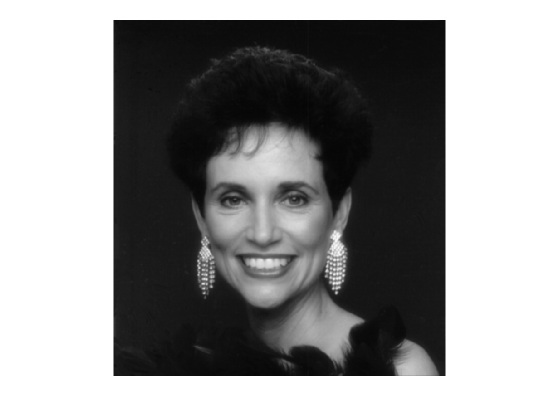

In [64]:
[M, N] = size(f);

H100 = lpfilter('gaussian', M, N, 100);
g100 = dftfilt(f, H100);
figure, imshow(g100);

$D_0=80$

警告: 图像太大，无法在屏幕上显示；将以 67% 显示
> In images.internal.initSize (line 71)
  In imshow (line 336)



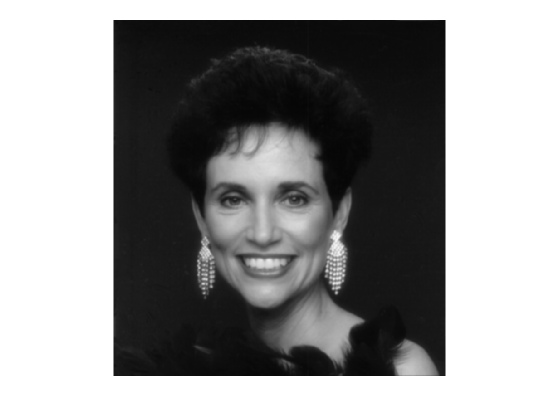

In [68]:
H80 = lpfilter('gaussian', M, N, 80);
g80 = dftfilt(f, H80);
figure, imshow(g80);

Next images show two applications of lowpass filtering on the same image, but with totally different objectives.

The original image is an $808\times 754$ very high resolution radiometer image showing part of the Gulf of Mexico (dark) and Florida (light) (note the horizontal sensor scan lines). This image is illustrative of remotely sensed images in which sensors have the tendency to produce pronounced scan lines along the direction in which the sense is being scanned.

警告: 图像太大，无法在屏幕上显示；将以 67% 显示
> In images.internal.initSize (line 71)
  In imshow (line 336)



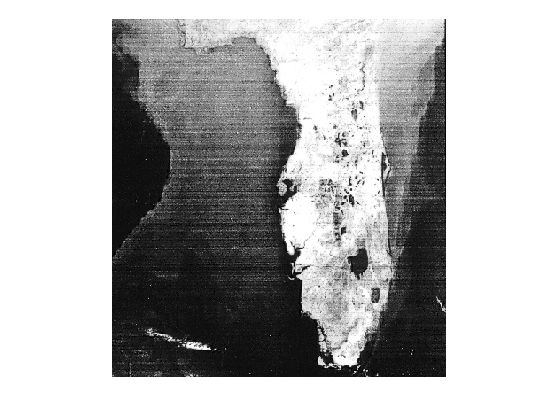

In [71]:
f = imread('Fig0451(a).tif');
imshow(f);

Lowpass filtering is a crude but simple way to reduce the effect of these lines, as the next figure shows. This image was obtained using a GLPF with $D_0=50$.

警告: 图像太大，无法在屏幕上显示；将以 67% 显示
> In images.internal.initSize (line 71)
  In imshow (line 336)



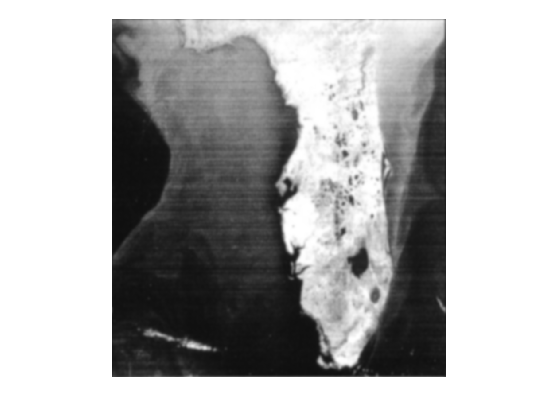

In [73]:
[M N] = size(f);

H50 = lpfilter('gaussian', M, N, 50);
g50 = dftfilt(f, H50);
figure, imshow(g50);

Next image shows the result of significantly more aggressive Gaussian lowpass filtering with $D_0=20$.

警告: 图像太大，无法在屏幕上显示；将以 67% 显示
> In images.internal.initSize (line 71)
  In imshow (line 336)



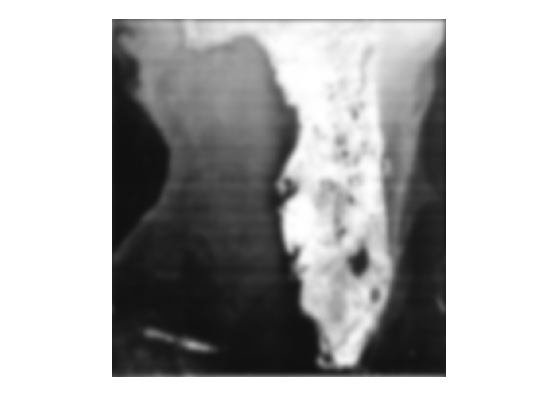

In [74]:
H20 = lpfilter('gaussian', M, N, 20);
g20 = dftfilt(f, H20);
figure, imshow(g20);

# 4.9 Image Sharpening Using Frequency Domain Filters

## 4.9.1 Ideal Highpass Filters (IHPF)

### Function `hpfilter`

Function `hpfilter` generates highpass filters, which has the same syntax as function `lpfilter`:

**H = hpfilter(type, M, N, D0, n)**

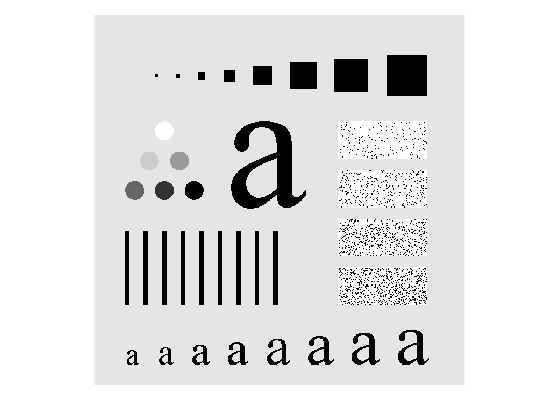

In [75]:
f = imread('Fig0441(a).tif');
imshow(f);

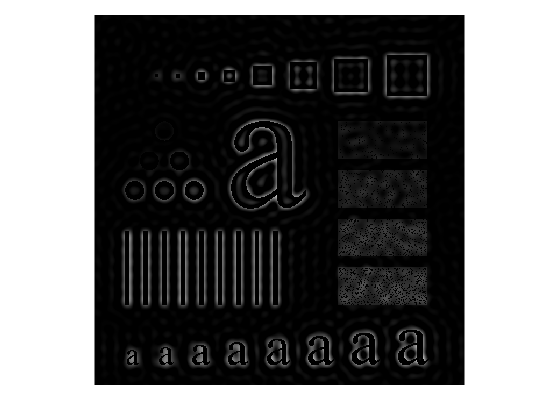

In [78]:
[M, N] = size(f);

H30 = hpfilter('ideal', M, N, 30);
g30 = dftfilt(f, H30);
figure, imshow(g30);

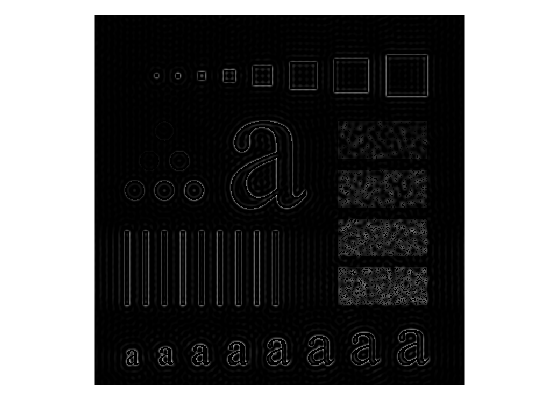

In [79]:
H60 = hpfilter('ideal', M, N, 60);
g60 = dftfilt(f, H60);
figure, imshow(g60);

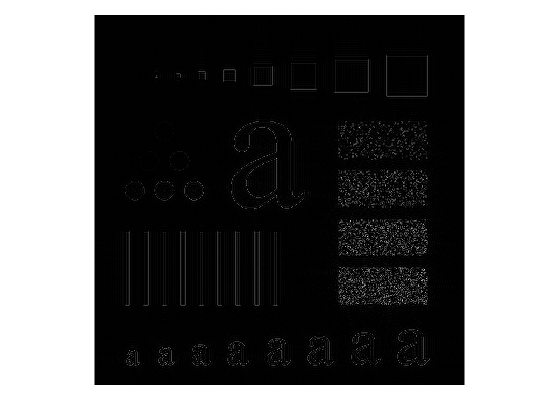

In [80]:
H160 = hpfilter('ideal', M, N, 160);
g160 = dftfilt(f, H160);
figure, imshow(g160);

## 4.9.3 Gaussian Highpass Filters (GHPF)

### Example 4.19: Using highpass filtering and thresholding for image enhancement.

The original image is a thumb print in which smudges (a typical problem) are evident. Enhancement is useful also in human interpretation of prints. In this example, we use highpass filtering to enhance the ridges an reduce the effects of smudging.

警告: 图像太大，无法在屏幕上显示；将以 67% 显示
> In images.internal.initSize (line 71)
  In imshow (line 336)



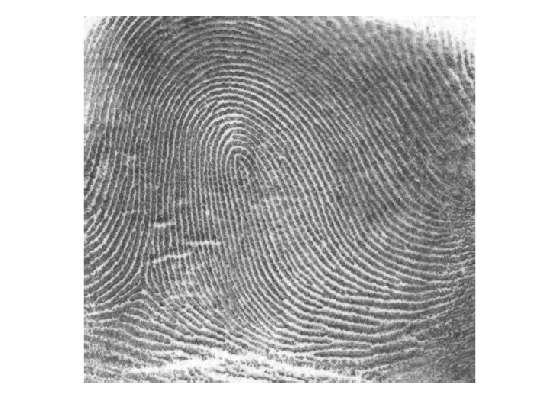

In [81]:
f = imread('Fig0457(a).tif');
imshow(f);

The next image is the result of using a Butterworth highpass filter of order 4 with a cutoff frequency of 50.

警告: 图像太大，无法在屏幕上显示；将以 67% 显示
> In images.internal.initSize (line 71)
  In imshow (line 336)



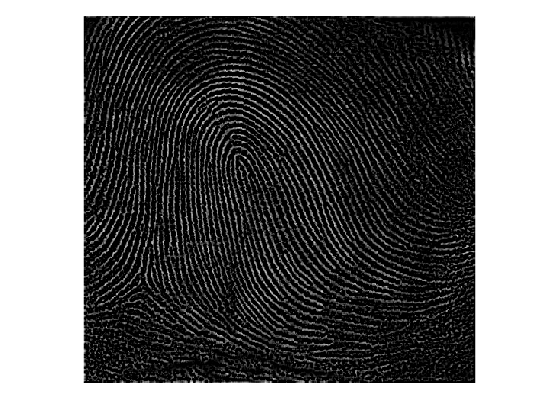

In [82]:
[M, N] = size(f);

H1 = hpfilter('btw', M, N, 50, 4);
g1 = dftfilt(f, H1);
figure, imshow(g1, []);

The next image shows the result of setting to black all negative values and to white all positive values in the filtered image.

警告: 图像太大，无法在屏幕上显示；将以 67% 显示
> In images.internal.initSize (line 71)
  In imshow (line 336)



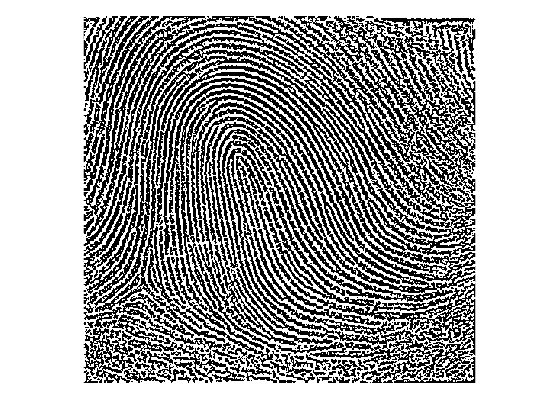

In [133]:
g2 = g1;
g2(g2 < 0) = 0;
g2(g2 > 0) = 1;
figure, imshow(g2, []);

## 4.9.4 The Laplacian in the Frequency Domain

### Example 4.20: Image sharpening in the frequency domain using the Laplacian.

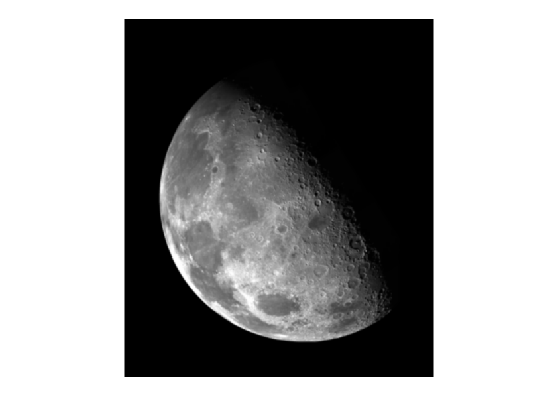

In [139]:
f = imread('Fig0458(a).tif');
imshow(f);

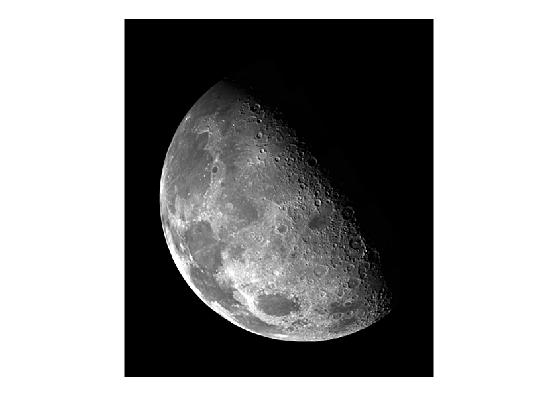

In [142]:
w = fspecial('laplacian', 0);
f1 = im2uint8(f);
g1 = imfilter(f1, w, 'replicate');
f2 = tofloat(f);
g2 = imfilter(f2, w, 'replicate');
g = f2 - g2;
figure, imshow(g);

## 4.9.5 Unsharp Masking, Highboost Filtering, and High-Frequency-Emphasis Filtering

### Function `paddedsize`

Assume that functions $f(x,y)$ and $h(x,y)$ are of size $A\times B$ and $C\times D$ respectively. We form two extended (padded) functions, both of size $P\times Q$, by appending zeros to $f$ and $h$. It can be shown that wraparound error is avoided by choosing $P\geq A+C-1$ and $Q\geq B+D-1$.

Most of the work in this chapter deals with functions of the same size, $M\times N$, in which case we use the following padding values: $P\geq 2M-1$ and $Q\geq 2N-1$.

Function `paddedsize` computes the minimun even values of $P$ and $Q$ required to satisfy the preceding equations.

It has the syntax:

**PQ = paddedsize(AB, CD, PARAM)**

In this chapter, we only use the basic syntax **PQ = paddedsize(AB)**.

### Example 4.21: Image enhancement using high-frequency-emphasis filtering.

The original image is a chest X-ray image with a narrow range of intensity levels.

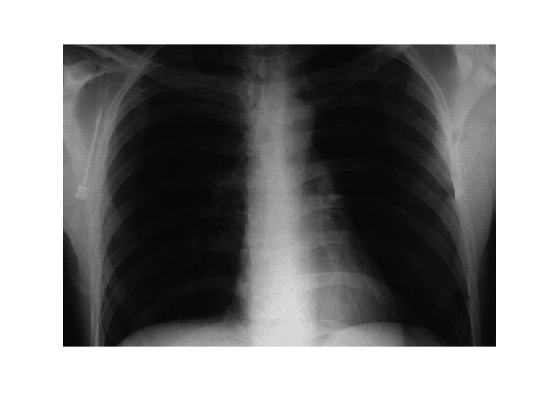

In [25]:
f = imread('Fig0459(a).tif');
imshow(f);

The next image shows the result of highpass filtering using a Gaussian filter with $D_0=40$ (approximately 5% of the short dimension of the padded image). The result shows faintly the principal edges in the image.

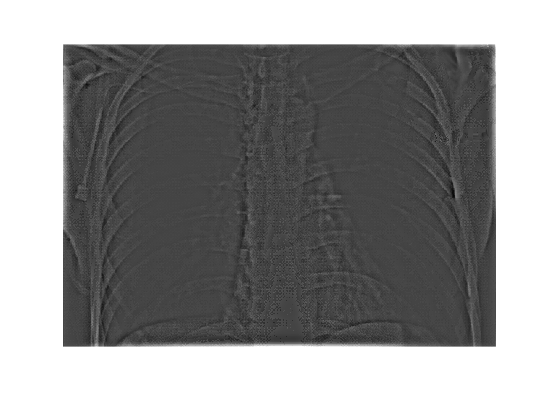

In [34]:
PQ = paddedsize(size(f));
D0 = 0.05 * PQ(1);
HBW = hpfilter('btw', PQ(1), PQ(2), D0, 2);
gbw = dftfilt(f, HBW, 'fltpoint');
gbw = gscale(gbw);
figure, imshow(gbw, []);

The next image shows the advantage of high-emphasis filtering. Although the image is still dark, the gray-level tonality due to the low-frequency components was not lost.

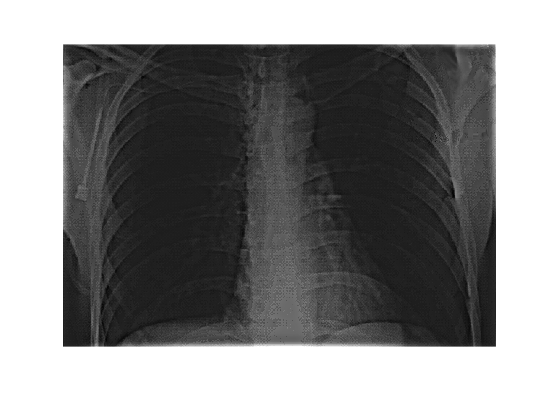

In [37]:
H = 0.5 + 2 * HBW;
ghf = dftfilt(f, H, 'fltpoint');
ghf = gscale(ghf);
figure, imshow(ghf, []);

An image characterized by intensity levels in a narrow range of the gray scale is an ideal candidate for histogram equalization. As the final image shows, this was indeed an appropriate method to further enhance the image.

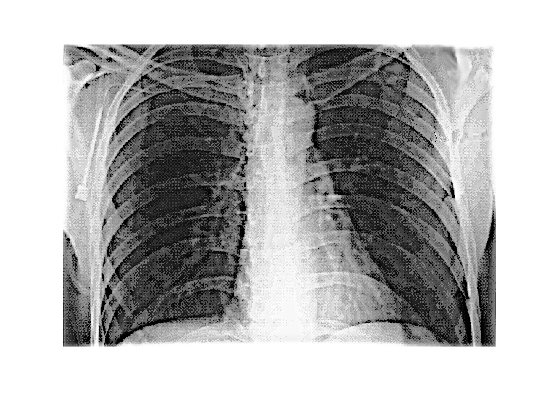

In [36]:
ghe = histeq(ghf, 256);
figure, imshow(ghe, []);